In [3]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")

df = df.iloc[1:].reset_index(drop=True)

df = df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q35", "Q33", "Q34"]]

df.head()

,Q1,Q2,Q3,Q4,Q5,Q35,Q33,Q34
0,Important,Strongly,Well informed,Satisfactory,Well,Satisfactory,Moderate,Satisfactory
1,Very important,Very strongly,Very well informed,Well,Well,Very strongly,Very high,Very well
2,Neutral,Strongly,Informed,Well,Satisfactory,Not at all,Very low,Very poor
3,Important,Neutral,Very well informed,Poor,Poor,Satisfactory,Moderate,Satisfactory
4,Important,Very strongly,Well informed,Very well,Very well,Strongly,High,Very well


In [4]:
def get_null_values(df):
    null_values = df.isnull().sum()

    print("Shape: ", df.shape)
    print("Null values in each column:\n", null_values)

In [5]:
df.dropna(inplace=True)

## Transparency

Q4, Q5


In [6]:
print("Unique values in the column: ", df["Q4"].unique())

Unique values in the column:  ['Satisfactory' 'Well' 'Poor' 'Very well' 'Very poor' 'No answer']


In [7]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q35,Q33,Q34
0,Important,Strongly,Well informed,Satisfactory,Well,Satisfactory,Moderate,Satisfactory
1,Very important,Very strongly,Very well informed,Well,Well,Very strongly,Very high,Very well
2,Neutral,Strongly,Informed,Well,Satisfactory,Not at all,Very low,Very poor
3,Important,Neutral,Very well informed,Poor,Poor,Satisfactory,Moderate,Satisfactory
4,Important,Very strongly,Well informed,Very well,Very well,Strongly,High,Very well


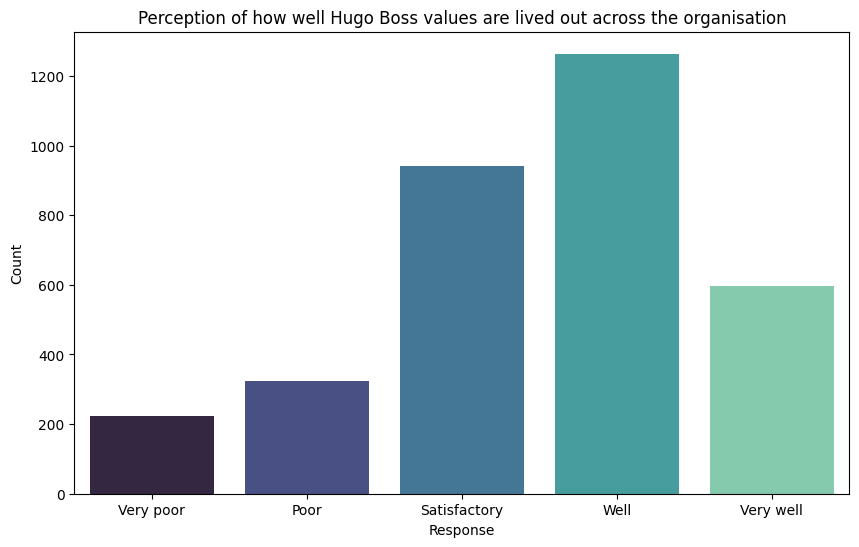

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Q4",
    data=df,
    order=["Very poor", "Poor", "Satisfactory", "Well", "Very well"],
    palette="mako",
)

plt.title(
    "Perception of how well Hugo Boss values are lived out across the organisation"
)
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

In [9]:
print("Unique values in the column: ", df["Q3"].unique())

Unique values in the column:  ['Well informed' 'Very well informed' 'Informed' 'Somewhat informed'
 'Not informed' 'No answer']


In [10]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q35,Q33,Q34
0,Important,Strongly,Well informed,Satisfactory,Well,Satisfactory,Moderate,Satisfactory
1,Very important,Very strongly,Very well informed,Well,Well,Very strongly,Very high,Very well
2,Neutral,Strongly,Informed,Well,Satisfactory,Not at all,Very low,Very poor
3,Important,Neutral,Very well informed,Poor,Poor,Satisfactory,Moderate,Satisfactory
4,Important,Very strongly,Well informed,Very well,Very well,Strongly,High,Very well


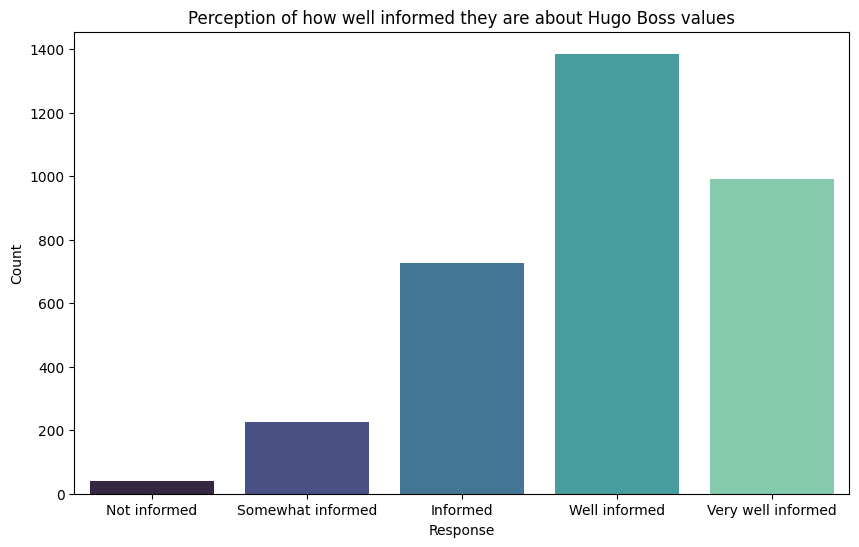

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Q3",
    data=df,
    order=[
        "Not informed",
        "Somewhat informed",
        "Informed",
        "Well informed",
        "Very well informed",
    ],
    palette="mako",
)

plt.title("Perception of how well informed they are about Hugo Boss values")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

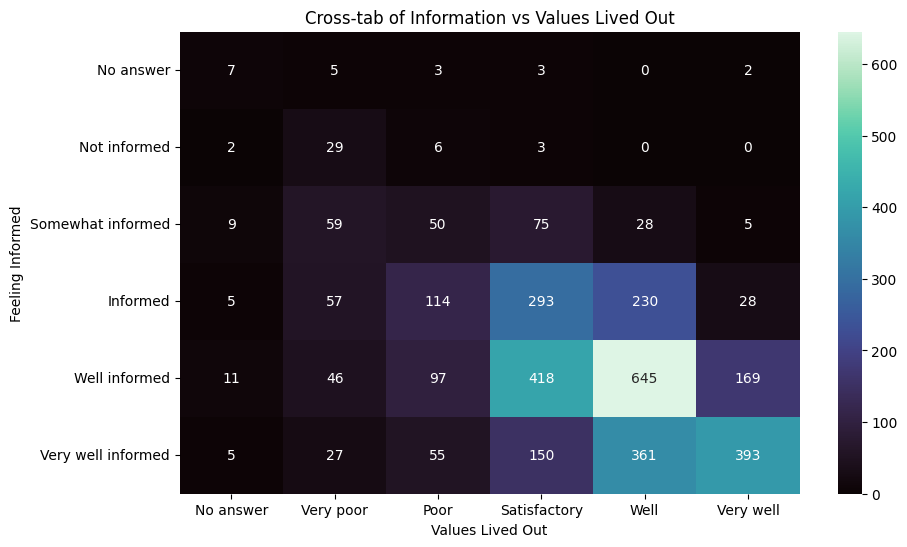

In [26]:
# Define the order of categories for the 'Values Lived Out' column
columns_order = ["No answer", "Very poor", "Poor", "Satisfactory", "Well", "Very well"]

# Define the order for the 'Feeling Informed' index
rows_order = [
    "No answer",
    "Not informed",
    "Somewhat informed",
    "Informed",
    "Well informed",
    "Very well informed",
]

# Create the crosstab and reorder columns and rows
crosstab_reordered = pd.crosstab(df["Q3"], df["Q4"])

# Reindex to apply the desired order
crosstab_reordered = crosstab_reordered.reindex(index=rows_order, columns=columns_order)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_reordered, annot=True, cmap="mako", fmt="g")

plt.title("Cross-tab of Information vs Values Lived Out")
plt.xlabel("Values Lived Out")
plt.ylabel("Feeling Informed")
plt.show()

## Engagement

"To what extent do you believe the HUGO BOSS values have a positive influence on your motivation and engagement?" Q33
Q35 "How strongly do the HUGO BOSS values positively influence the working atmosphere in your division?"


In [13]:
print("Unique values in the column: ", df["Q33"].unique())
print("Unique values in the column: ", df["Q35"].unique())

Unique values in the column:  ['Moderate' 'Very high' 'Very low' 'High' 'Low' 'No answer']
Unique values in the column:  ['Satisfactory' 'Very strongly' 'Not at all' 'Strongly' 'Hardly'
 'No answer']


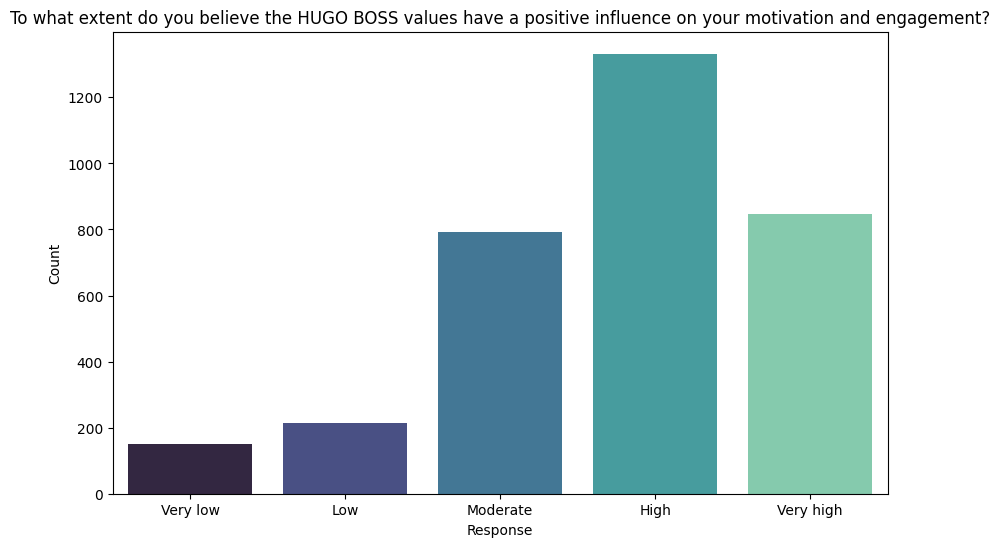

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Q33",
    data=df,
    order=["Very low", "Low", "Moderate", "High", "Very high"],
    palette="mako",
)

plt.title(
    "To what extent do you believe the HUGO BOSS values have a positive influence on your motivation and engagement?"
)
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

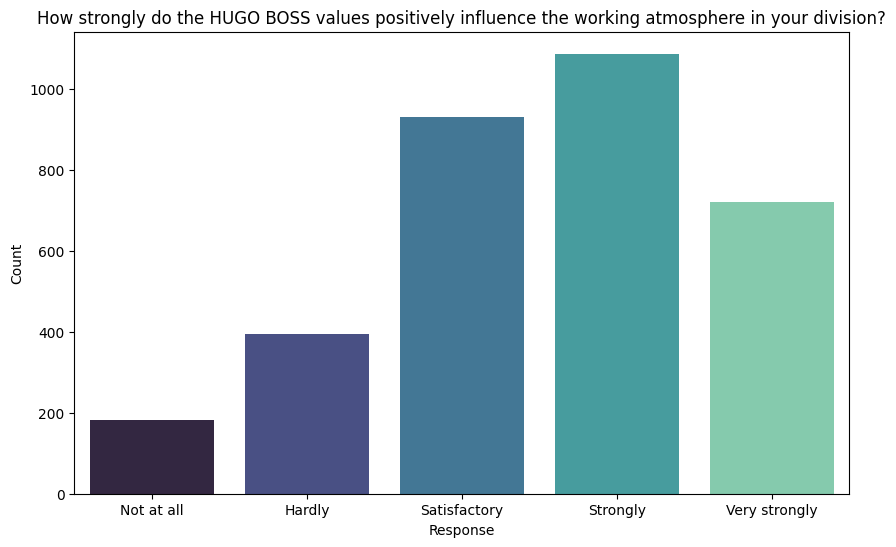

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Q35",
    data=df,
    order=[
        "Not at all",
        "Hardly",
        "Satisfactory",
        "Strongly",
        "Very strongly",
    ],
    palette="mako",
)

plt.title(
    "How strongly do the HUGO BOSS values positively influence the working atmosphere in your division?"
)
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

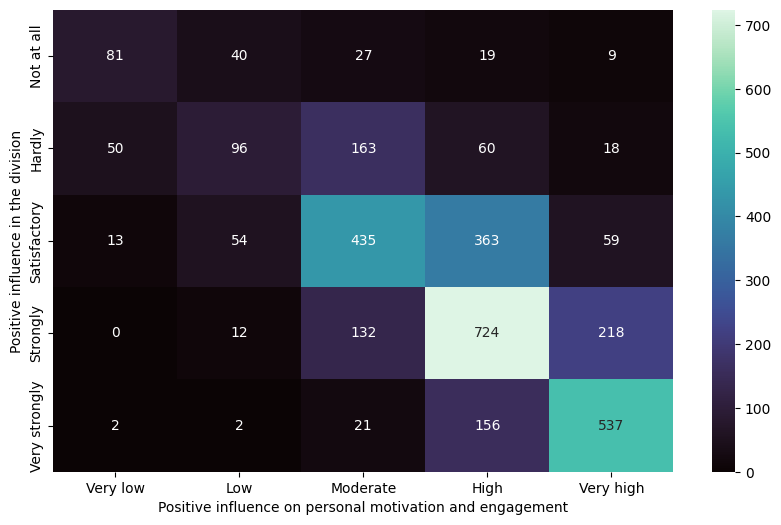

In [30]:
# Define the order of categories for the 'Values Lived Out' column
columns_order = ["Very low", "Low", "Moderate", "High", "Very high"]

# Define the order for the 'Feeling Informed' index
rows_order = [
    "Not at all",
    "Hardly",
    "Satisfactory",
    "Strongly",
    "Very strongly",
]

# Create the crosstab and reorder columns and rows
crosstab_reordered = pd.crosstab(df["Q35"], df["Q33"])

# Reindex to apply the desired order
crosstab_reordered = crosstab_reordered.reindex(index=rows_order, columns=columns_order)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_reordered, annot=True, cmap="mako", fmt="g")

plt.xlabel("Positive influence on personal motivation and engagement")
plt.ylabel("Positive influence in the division")
plt.show()